<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230924_imbalanced_ab_test/%E4%B8%8D%E5%9D%87%E7%AD%89%E3%81%AB%E5%89%B2%E3%82%8A%E6%8C%AF%E3%81%A3%E3%81%9FAB%E3%83%86%E3%82%B9%E3%83%88%E3%81%AE%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import bernoulli, norm, skew

import matplotlib.pyplot as plt

In [2]:
p = 0.001
sample_size_a = 1000
sample_size_b = 100
num_iteration = 10000

rs = np.random.RandomState(11)

x_a = rs.binomial(sample_size_a, p, size=num_iteration)
x_b = rs.binomial(sample_size_b, p, size=num_iteration)

In [3]:
# 分布の skewness と経験的に必要なサンプルサイズ
skewness = bernoulli.stats(p, moments="s")
skewness, skewness ** 2 * 355

(31.575322658699797, 353935.35535535525)

In [4]:
# 2標本の母比率の差の z 検定
p_hat_a = x_a / sample_size_a
p_hat_b = x_b / sample_size_b

sum_of_sample_size = sample_size_a + sample_size_b

p_hat_pooled = (x_a + x_b) / sum_of_sample_size

z_values = (p_hat_a - p_hat_b) / np.sqrt(p_hat_pooled * (1 - p_hat_pooled) * (1/sample_size_a + 1/sample_size_b))

z_alpha = norm.ppf(0.975)
(z_values< -z_alpha).sum() / num_iteration, (z_values>z_alpha).sum() / num_iteration, (np.abs(z_values)>z_alpha).sum() / num_iteration

<ipython-input-4-72c49d04bb60>:9: RuntimeWarning: invalid value encountered in divide
  z_values = (p_hat_a - p_hat_b) / np.sqrt(p_hat_pooled * (1 - p_hat_pooled) * (1/sample_size_a + 1/sample_size_b))


(0.0713, 0.0, 0.0713)

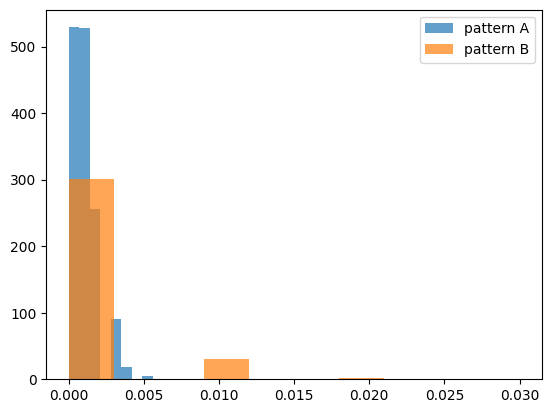

In [5]:
# 参考： 標本 CV 率の分布
fig, ax = plt.subplots()

ax.hist(p_hat_a, density=True, alpha=0.7, label="pattern A")
ax.hist(p_hat_b, density=True, alpha=0.7, label="pattern B")

ax.legend()

In [6]:
skew(p_hat_a), skew(p_hat_b)

(1.0075073847610363, 3.132640198793857)

(array([2.000e+00, 0.000e+00, 2.500e+01, 1.100e+01, 0.000e+00, 8.470e+02,
        6.400e+01, 0.000e+00, 8.902e+03, 1.490e+02]),
 array([-0.03  , -0.0263, -0.0226, -0.0189, -0.0152, -0.0115, -0.0078,
        -0.0041, -0.0004,  0.0033,  0.007 ]),
 <BarContainer object of 10 artists>)

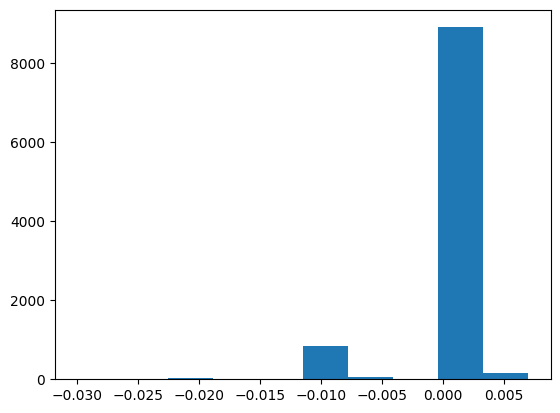

In [7]:
# 参考： 標本 CV 率の差の分布
fig, ax = plt.subplots()
ax.hist(p_hat_a - p_hat_b)

In [8]:
skew(p_hat_a - p_hat_b)

-2.667806182944919